In [4]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import math
from collections import defaultdict

In [5]:
users = {
    3, #t
    5, #m
    6, #p
    7, #h
}

windows_per_csv_file = 25
window_size_in_seconds = 3
window_overlap = 0.75 # 75%

In [6]:
concept_dataframes = {}
for u in users:
    concept_dataframes[u] = pd.read_csv(f"concept_labeling_outputs/dataset_with_concepts_user{u}.csv")

In [7]:
# List to hold all dataframes
all_dfs = []

for u, df in concept_dataframes.items():
    print(f"Dataframe head for user {u} ========================================================================")
    print(f"Shape of df = {df.shape}")
    all_dfs.append(df)

df_all = pd.concat(all_dfs, ignore_index=True)

print(f"Combined dataframe ========================================================================")
print(f"Combined dataset shape: {df_all.shape}")
print(df_all["user"].value_counts())


Dataframe head for user 3 ========================================================================
Shape of df = (1424, 10)
Dataframe head for user 5 ========================================================================
Shape of df = (1500, 10)
Dataframe head for user 6 ========================================================================
Shape of df = (1347, 10)
Dataframe head for user 7 ========================================================================
Shape of df = (1431, 10)
Combined dataframe ========================================================================
Combined dataset shape: (5702, 10)
user
5    1500
7    1431
3    1424
6    1347
Name: count, dtype: int64


In [8]:
# Display detailed statistics about the merged dataset
print("\n" + "="*80)
print("DETAILED STATISTICS - Merged Dataset with Concepts")
print("="*80)

print(f"\nUser distribution:")
print(df_all["user"].value_counts().sort_index())

print(f"\nActivity distribution:")
print(df_all["activity"].value_counts())

print(f"\nConcept labels:")
print(f"  Periodicity - unique values: {sorted(df_all['periodicity'].unique())}")
print(f"  Temporal Stability - unique values: {sorted(df_all['temporal_stability'].unique())}")
print(f"  Coordination - unique values: {sorted(df_all['coordination'].unique())}")

print(f"\nDataset info:")
print(df_all.info())



DETAILED STATISTICS - Merged Dataset with Concepts

User distribution:
user
3    1424
5    1500
6    1347
7    1431
Name: count, dtype: int64

Activity distribution:
activity
Jogging       1062
Walking       1013
Sitting        958
Standing       957
Upstairs       925
Downstairs     787
Name: count, dtype: int64

Concept labels:
  Periodicity - unique values: [np.float64(0.0), np.float64(0.5), np.float64(1.0)]
  Temporal Stability - unique values: [np.float64(0.0), np.float64(0.43), np.float64(0.5), np.float64(1.0)]
  Coordination - unique values: [np.float64(0.0), np.float64(0.5), np.float64(0.56), np.float64(0.95), np.float64(1.0)]

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5702 entries, 0 to 5701
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user                5702 non-null   int64  
 1   activity            5702 non-null   object 
 2   timestamp           5702 non-null

In [9]:
# Load and merge window labels
window_dataframes = {}
for u in users:
    window_dataframes[u] = pd.read_csv(f"concept_labeling_outputs/window_labels_user{u}.csv")

# List to hold all window label dataframes
all_window_dfs = []

for u, df in window_dataframes.items():
    print(f"Window labels for user {u}: shape = {df.shape}")
    all_window_dfs.append(df)

df_windows = pd.concat(all_window_dfs, ignore_index=True)

print(f"\n" + "="*80)
print(f"Combined window labels shape: {df_windows.shape}")
print(f"Total windows: {len(df_windows)}")
print("="*80)


Window labels for user 3: shape = (25, 8)
Window labels for user 5: shape = (25, 8)
Window labels for user 6: shape = (25, 8)
Window labels for user 7: shape = (25, 8)

Combined window labels shape: (100, 8)
Total windows: 100


In [10]:
# Display statistics about merged window labels
print("\n" + "="*80)
print("DETAILED STATISTICS - Merged Window Labels")
print("="*80)

print(f"\nUser distribution:")
print(df_windows["user"].value_counts().sort_index())

print(f"\nActivity distribution:")
print(df_windows["activity"].value_counts())

print(f"\nConcept labels distribution by activity:")
for activity in sorted(df_windows["activity"].unique()):
    activity_df = df_windows[df_windows["activity"] == activity]
    print(f"\n{activity}:")
    print(f"  Periodicity: {activity_df['periodicity'].value_counts().to_dict()}")
    print(f"  Temporal Stability: {activity_df['temporal_stability'].value_counts().to_dict()}")
    print(f"  Coordination: {activity_df['coordination'].value_counts().to_dict()}")

print(f"\nFirst 10 rows:")
print(df_windows.head(10))



DETAILED STATISTICS - Merged Window Labels

User distribution:
user
3    25
5    25
6    25
7    25
Name: count, dtype: int64

Activity distribution:
activity
Jogging       18
Walking       17
Sitting       17
Standing      16
Upstairs      16
Downstairs    16
Name: count, dtype: int64

Concept labels distribution by activity:

Downstairs:
  Periodicity: {0.0: 7, 0.5: 6, 1.0: 3}
  Temporal Stability: {0.5: 9, 0.0: 7}
  Coordination: {0.0: 8, 0.5: 7, 1.0: 1}

Jogging:
  Periodicity: {1.0: 13, 0.5: 4, 0.0: 1}
  Temporal Stability: {1.0: 7, 0.0: 6, 0.5: 5}
  Coordination: {0.5: 10, 0.0: 5, 1.0: 3}

Sitting:
  Periodicity: {0.0: 12, 1.0: 4, 0.5: 1}
  Temporal Stability: {1.0: 10, 0.5: 7}
  Coordination: {1.0: 13, 0.5: 4}

Standing:
  Periodicity: {0.0: 12, 1.0: 4}
  Temporal Stability: {1.0: 7, 0.5: 7, 0.0: 2}
  Coordination: {0.5: 10, 1.0: 6}

Upstairs:
  Periodicity: {0.5: 10, 1.0: 3, 0.0: 3}
  Temporal Stability: {0.5: 10, 1.0: 3, 0.0: 2, 0.43: 1}
  Coordination: {0.5: 9, 1.0: 5, 0.0: 

In [11]:
# Save the merged datasets
print("\n" + "="*80)
print("SAVING MERGED DATASETS")
print("="*80)

# Save the merged dataset with concepts (full sensor data)
output_file_concepts = "merged_dataset_with_concepts.csv"
df_all.to_csv(output_file_concepts, index=False)
print(f"\n✓ Saved merged dataset with concepts to: {output_file_concepts}")
print(f"  Shape: {df_all.shape}")
print(f"  Columns: {list(df_all.columns)}")
print(f"  Total samples: {len(df_all):,}")

# Save the merged window labels
output_file_windows = "merged_window_labels.csv"
df_windows.to_csv(output_file_windows, index=False)
print(f"\n✓ Saved merged window labels to: {output_file_windows}")
print(f"  Shape: {df_windows.shape}")
print(f"  Columns: {list(df_windows.columns)}")
print(f"  Total windows: {len(df_windows):,}")

print("\n" + "="*80)
print("✓✓✓ MERGE COMPLETE! ✓✓✓")
print("="*80)
print(f"\nDatasets ready for training concept predictor:")
print(f"  • {len(df_all):,} individual samples from {len(users)} users")
print(f"  • {len(df_windows):,} time windows from {len(users)} users")
print(f"  • Users: {sorted(list(users))}")
print(f"  • Activities: {sorted(df_all['activity'].unique())}")
print(f"  • Concepts: periodicity, temporal_stability, coordination")



SAVING MERGED DATASETS

✓ Saved merged dataset with concepts to: merged_dataset_with_concepts.csv
  Shape: (5702, 10)
  Columns: ['user', 'activity', 'timestamp', 'x-axis', 'y-axis', 'z-axis', 'time_s', 'periodicity', 'temporal_stability', 'coordination']
  Total samples: 5,702

✓ Saved merged window labels to: merged_window_labels.csv
  Shape: (100, 8)
  Columns: ['window_idx', 'user', 'activity', 'start_time', 'end_time', 'periodicity', 'temporal_stability', 'coordination']
  Total windows: 100

✓✓✓ MERGE COMPLETE! ✓✓✓

Datasets ready for training concept predictor:
  • 5,702 individual samples from 4 users
  • 100 time windows from 4 users
  • Users: [3, 5, 6, 7]
  • Activities: ['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs', 'Walking']
  • Concepts: periodicity, temporal_stability, coordination


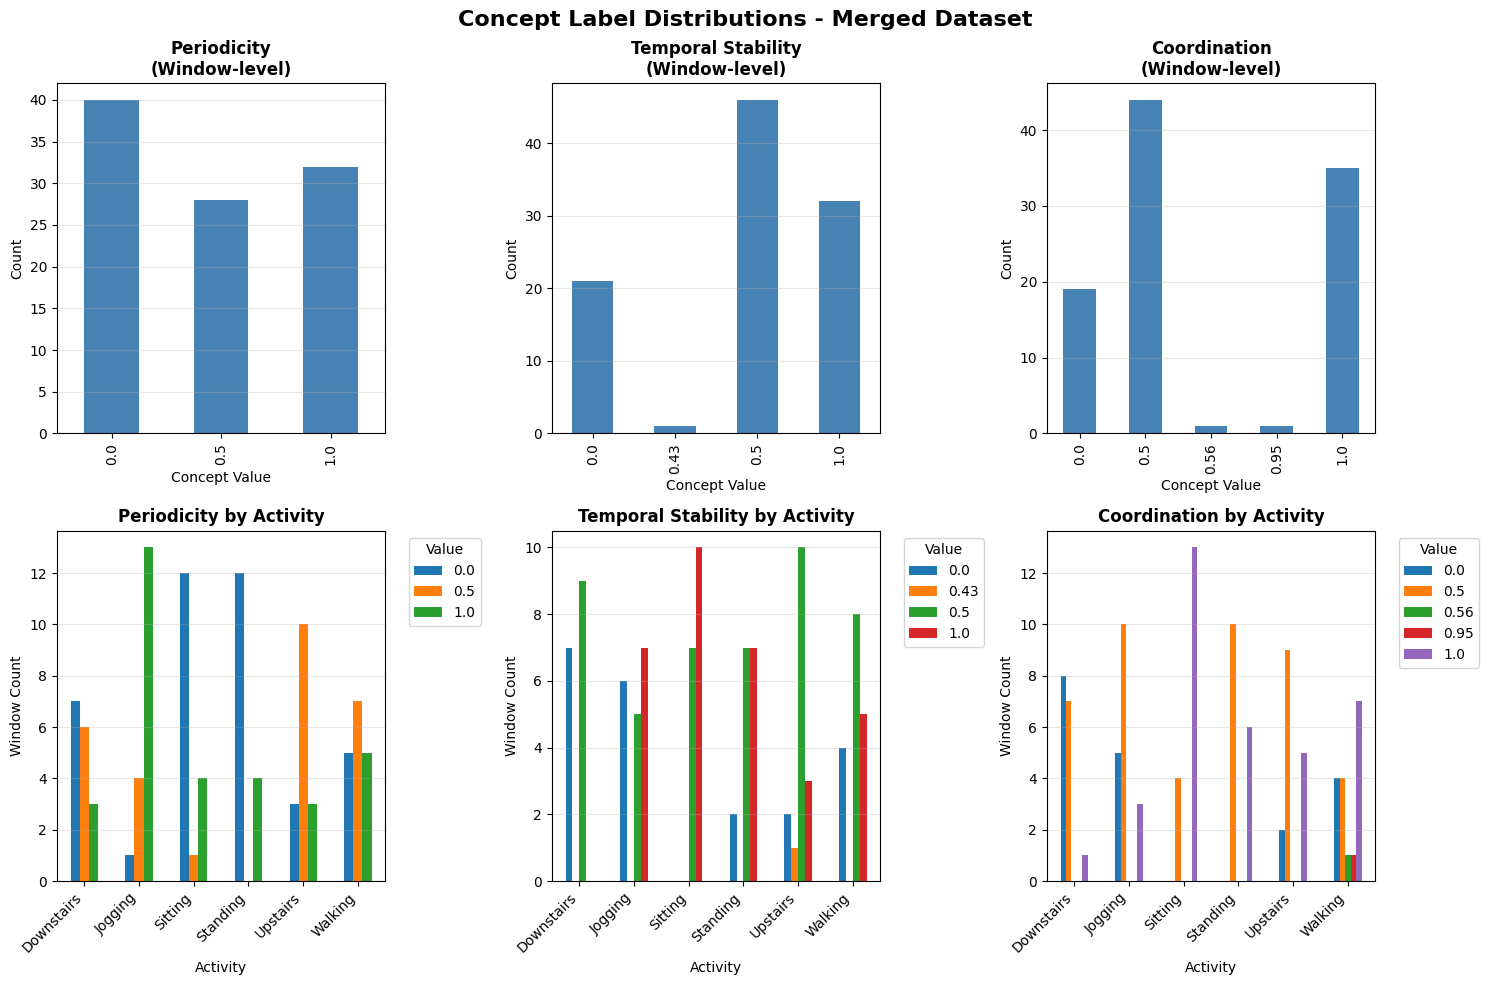


✓ Visualization complete!


In [12]:
# Visualize concept distributions
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Concept Label Distributions - Merged Dataset', fontsize=16, fontweight='bold')

# For window labels (aggregated)
concepts = ['periodicity', 'temporal_stability', 'coordination']
for idx, concept in enumerate(concepts):
    ax = axes[0, idx]
    df_windows[concept].value_counts().sort_index().plot(kind='bar', ax=ax, color='steelblue')
    ax.set_title(f'{concept.replace("_", " ").title()}\n(Window-level)', fontweight='bold')
    ax.set_xlabel('Concept Value')
    ax.set_ylabel('Count')
    ax.grid(axis='y', alpha=0.3)

# Concept distributions by activity (window-level)
for idx, concept in enumerate(concepts):
    ax = axes[1, idx]
    activity_concept = df_windows.groupby(['activity', concept]).size().unstack(fill_value=0)
    activity_concept.plot(kind='bar', ax=ax, stacked=False)
    ax.set_title(f'{concept.replace("_", " ").title()} by Activity', fontweight='bold')
    ax.set_xlabel('Activity')
    ax.set_ylabel('Window Count')
    ax.legend(title='Value', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(axis='y', alpha=0.3)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

print("\n✓ Visualization complete!")
